## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
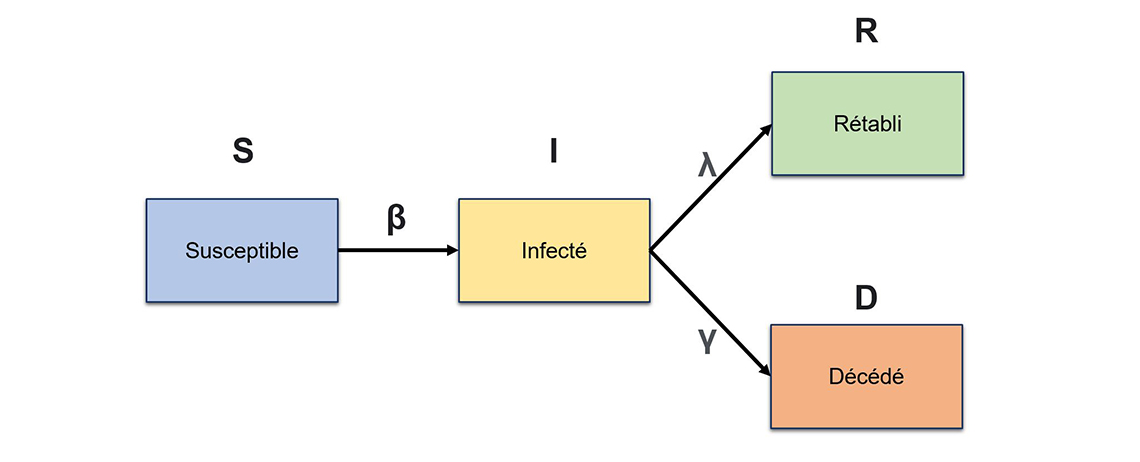


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [12]:
import numpy as np

def euler_sird(S0, I0, R0, D0, beta, gamma, mu, delta_t, num_steps):
    S, I, R, D = [S0], [I0], [R0], [D0]

    for _ in range(num_steps):
        S_next = S[-1] - delta_t * beta * S[-1] * I[-1]
        I_next = I[-1] + delta_t * (beta * S[-1] * I[-1] - gamma * I[-1] - mu * I[-1])
        R_next = R[-1] + delta_t * gamma * I[-1]
        D_next = D[-1] + delta_t * mu * I[-1]

        S.append(S_next)
        I.append(I_next)
        R.append(R_next)
        D.append(D_next)

    return np.array(S), np.array(I), np.array(R), np.array(D)

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

T = 90
beta = 0.5
gamma = 0.15
mu = 0.015
delta_t = 0.01
num_steps = int(T / delta_t)

S0 = 0.998
I0 = 0.01
R0 = 0.0
D0 = 0.0

def euler_sird(S0, I0, R0, D0, beta, gamma, mu, delta_t, num_steps):
    S, I, R, D = [S0], [I0], [R0], [D0]

    for _ in range(num_steps):
        S_next = S[-1] - delta_t * beta * S[-1] * I[-1]
        I_next = I[-1] + delta_t * (beta * S[-1] * I[-1] - gamma * I[-1] - mu * I[-1])
        R_next = R[-1] + delta_t * gamma * I[-1]
        D_next = D[-1] + delta_t * mu * I[-1]

        S.append(S_next)
        I.append(I_next)
        R.append(R_next)
        D.append(D_next)

    return np.array(S), np.array(I), np.array(R), np.array(D)

S_sim, I_sim, R_sim, D_sim = euler_sird(S0, I0, R0, D0, beta, gamma, mu, delta_t, num_steps)

simulation_results_df = pd.DataFrame({
    'Jour': range(num_steps + 1),
    'Susceptibles': S_sim,
    'Infectés': I_sim,
    'Rétablis': R_sim,
    'Décès': D_sim
})

print(simulation_results_df.head())


   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.998000  0.010000  0.000000  0.000000
1     1      0.997950  0.010033  0.000015  0.000001
2     2      0.997900  0.010067  0.000030  0.000003
3     3      0.997850  0.010101  0.000045  0.000005
4     4      0.997799  0.010134  0.000060  0.000006


   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.998000  0.010000  0.000000  0.000000
1     1      0.997950  0.010033  0.000015  0.000001
2     2      0.997900  0.010067  0.000030  0.000003
3     3      0.997850  0.010101  0.000045  0.000005
4     4      0.997799  0.010134  0.000060  0.000006


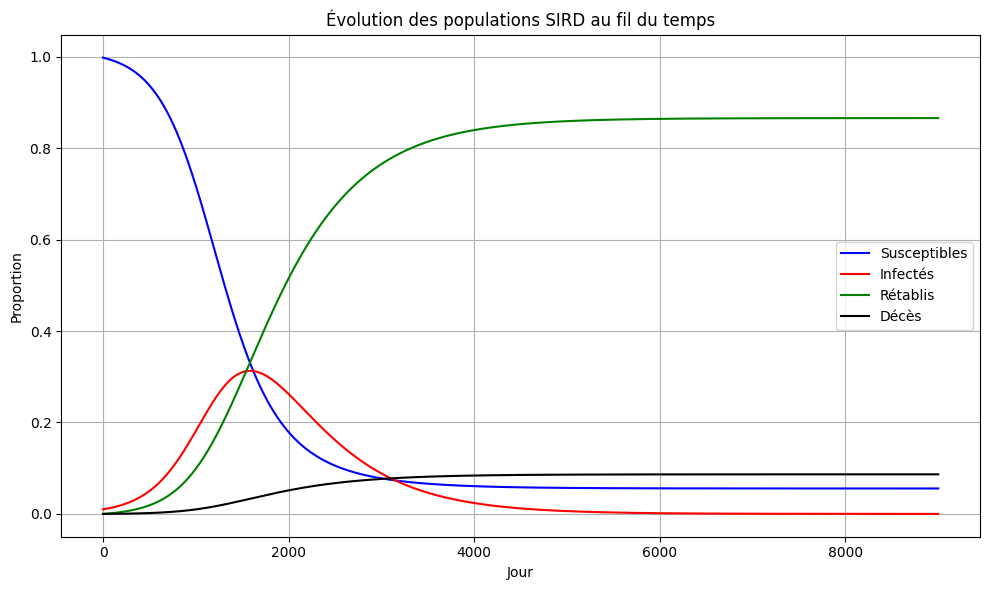

In [14]:
#2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for the simulation
T = 90
beta = 0.5
gamma = 0.15
mu = 0.015
delta_t = 0.01
num_steps = int(T / delta_t)

# Initial values
S0 = 0.998
I0 = 0.01
R0 = 0.0
D0 = 0.0

# Define the Euler method for the SIRD model
def euler_sird(S0, I0, R0, D0, beta, gamma, mu, delta_t, num_steps):
    S, I, R, D = [S0], [I0], [R0], [D0]

    for _ in range(num_steps):
        S_next = S[-1] - delta_t * beta * S[-1] * I[-1]
        I_next = I[-1] + delta_t * (beta * S[-1] * I[-1] - gamma * I[-1] - mu * I[-1])
        R_next = R[-1] + delta_t * gamma * I[-1]
        D_next = D[-1] + delta_t * mu * I[-1]

        S.append(S_next)
        I.append(I_next)
        R.append(R_next)
        D.append(D_next)

    return np.array(S), np.array(I), np.array(R), np.array(D)

# Apply the Euler method with the given parameters
S_sim, I_sim, R_sim, D_sim = euler_sird(S0, I0, R0, D0, beta, gamma, mu, delta_t, num_steps)

# Create a DataFrame to compare results with the given parameters
simulation_results_df = pd.DataFrame({
    'Jour': range(num_steps + 1),
    'Susceptibles': S_sim,
    'Infectés': I_sim,
    'Rétablis': R_sim,
    'Décès': D_sim
})

# Display the simulation results
print(simulation_results_df.head())

# Plotting all the results on a single graph
plt.figure(figsize=(10, 6))

# Susceptibles
plt.plot(simulation_results_df['Jour'], simulation_results_df['Susceptibles'], 'b', label='Susceptibles')

# Infectés
plt.plot(simulation_results_df['Jour'], simulation_results_df['Infectés'], 'r', label='Infectés')

# Rétablis
plt.plot(simulation_results_df['Jour'], simulation_results_df['Rétablis'], 'g', label='Rétablis')

# Décès
plt.plot(simulation_results_df['Jour'], simulation_results_df['Décès'], 'k', label='Décès')

# Labels and title
plt.xlabel('Jour')
plt.ylabel('Proportion')
plt.title('Évolution des populations SIRD au fil du temps')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [6]:
#1
import pandas as pd
dataset_path = '/sird_dataset (1).csv'
data = pd.read_csv(dataset_path)

data.head()


,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894


In [19]:
#2
from sklearn.metrics import mean_squared_error

def sird_error(params, S0, I0, R0, D0, delta_t, observed_data):
    beta, gamma, mu = params
    S, I, R, D = euler_sird(S0, I0, R0, D0, beta, gamma, mu, delta_t, len(observed_data) * 100 - 1)

    error = mean_squared_error(observed_data['Susceptibles'], S[::100]) + \
            mean_squared_error(observed_data['Infectés'], I[::100]) + \
            mean_squared_error(observed_data['Rétablis'], R[::100]) + \
            mean_squared_error(observed_data['Décès'], D[::100])

    return error

# Initial parameter guesses
initial_params = [0.3, 0.1, 0.01]

# Example usage of the function
S0 = data['Susceptibles'][0]
I0 = data['Infectés'][0]
R0 = data['Rétablis'][0]
D0 = data['Décès'][0]
delta_t = 0.01  # Time step

# Calculate the error for initial parameters
error = sird_error(initial_params, S0, I0, R0, D0, delta_t, data)
error

0.6232032081843313

In [20]:
#3
from itertools import product

# Define the ranges for the parameters
beta_range = np.linspace(0.25, 0.5, 6)
gamma_range = np.linspace(0.08, 0.15, 8)
mu_range = np.linspace(0.005, 0.015, 11)

# Initialize the best parameters and the minimum error
best_params = None
min_error = float('inf')

# Perform grid search
for beta, gamma, mu in product(beta_range, gamma_range, mu_range):
    params = [beta, gamma, mu]
    error = sird_error(params, S0, I0, R0, D0, delta_t, data)
    if error < min_error:
        min_error = error
        best_params = params

# Display the best parameters and the minimum error
best_params, min_error


([0.25, 0.15, 0.015], 0.11386354116596202)

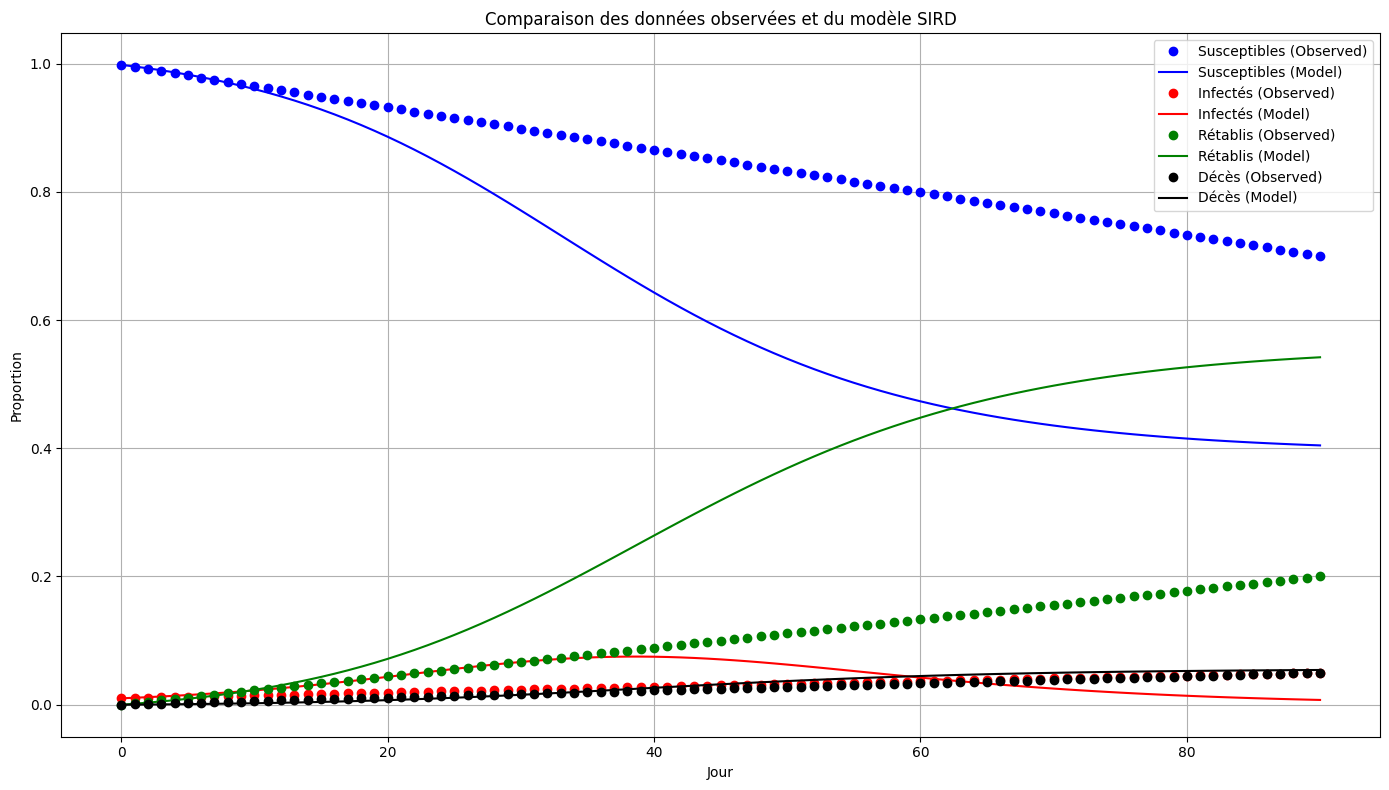

In [21]:
#4
# Parameters from the grid search
beta_opt, gamma_opt, mu_opt = best_params

# Apply the Euler method with the optimal parameters
S_opt, I_opt, R_opt, D_opt = euler_sird(S0, I0, R0, D0, beta_opt, gamma_opt, mu_opt, delta_t, len(data) * 100 - 1)

# Create a DataFrame for the optimal simulation results
optimal_results_df = pd.DataFrame({
    'Jour': np.arange(0, len(data) * 100) * delta_t,
    'Susceptibles (Opt)': S_opt,
    'Infectés (Opt)': I_opt,
    'Rétablis (Opt)': R_opt,
    'Décès (Opt)': D_opt
})

# Plotting the results including susceptibles
plt.figure(figsize=(14, 8))

# Susceptibles
plt.plot(data['Jour'], data['Susceptibles'], 'bo', label='Susceptibles (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Susceptibles (Opt)'][::100], 'b-', label='Susceptibles (Model)')

# Infectés
plt.plot(data['Jour'], data['Infectés'], 'ro', label='Infectés (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Infectés (Opt)'][::100], 'r-', label='Infectés (Model)')

# Rétablis
plt.plot(data['Jour'], data['Rétablis'], 'go', label='Rétablis (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Rétablis (Opt)'][::100], 'g-', label='Rétablis (Model)')

# Décès
plt.plot(data['Jour'], data['Décès'], 'ko', label='Décès (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Décès (Opt)'][::100], 'k-', label='Décès (Model)')

# Labels and title
plt.xlabel('Jour')
plt.ylabel('Proportion')
plt.title('Comparaison des données observées et du modèle SIRD')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.

In [10]:
#2
# Paramètres optimaux sans intervention
beta_no_intervention = 0.35
gamma_opt = 0.11
mu_opt = 0.012

# Paramètres avec intervention
beta_intervention = 0.2

# Simulation sans intervention
S_no_int, I_no_int, R_no_int, D_no_int = euler_sird(S0, I0, R0, D0, beta_no_intervention, gamma_opt, mu_opt, delta_t, len(data) * 100 - 1)

# Simulation avec intervention
S_int, I_int, R_int, D_int = euler_sird(S0, I0, R0, D0, beta_intervention, gamma_opt, mu_opt, delta_t, len(data) * 100 - 1)

# Create DataFrames for the results
no_intervention_df = pd.DataFrame({
    'Jour': np.arange(0, len(data) * 100) * delta_t,
    'Susceptibles': S_no_int,
    'Infectés': I_no_int,
    'Rétablis': R_no_int,
    'Décès': D_no_int
})

intervention_df = pd.DataFrame({
    'Jour': np.arange(0, len(data) * 100) * delta_t,
    'Susceptibles': S_int,
    'Infectés': I_int,
    'Rétablis': R_int,
    'Décès': D_int
})

3.